Carga de Archivo que contiene los precios de energia en función del tiempo. 

In [4]:
import pandas as pd

df2017 = pd.read_csv("Datos2017.csv", engine='python')
df2018 = pd.read_csv("Datos2018.csv", engine = 'python')
df2017.head()
df2018.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
0,01/01/2018,1,ACAPULCO,685.78,620.61,65.17,0.0
1,01/01/2018,2,ACAPULCO,656.15,598.67,57.48,0.0
2,01/01/2018,3,ACAPULCO,648.10,593.70,54.40,0.0
3,01/01/2018,4,ACAPULCO,622.45,572.44,50.01,0.0
4,01/01/2018,5,ACAPULCO,585.41,541.02,44.40,0.0


Se filtra la zona.

In [3]:
zona = 'ZAMORA'
dfZona17 = df2017[df2017['Zona de Carga'].isin([zona])]
dfZona18 = df2018[df2018['Zona de Carga'].isin([zona])]
dfZona17.head()
dfZona18.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
2352,01/01/2018,1,ZAMORA,645.20,620.61,24.59,0.0
2353,01/01/2018,2,ZAMORA,618.09,598.67,19.42,0.0
2354,01/01/2018,3,ZAMORA,612.78,593.70,19.08,0.0
2355,01/01/2018,4,ZAMORA,589.45,572.44,17.01,0.0
2356,01/01/2018,5,ZAMORA,553.87,541.02,12.85,0.0


Como solo se necesitan las primeras 3 columnas para realizar la primera regresión lineal, se crea un nuevo DataFrame. 

In [5]:
dfFilt17 = dfZona17[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt18 = dfZona18[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt17.head()
dfFilt18.head()

,Fecha,Hora,Precio Zonal ($/MWh)
2352,01/01/2018,1,645.20
2353,01/01/2018,2,618.09
2354,01/01/2018,3,612.78
2355,01/01/2018,4,589.45
2356,01/01/2018,5,553.87


Selección de variables dependientes e independientes.

Definición de set de entrenamiento y de pruebas tanto de variables dependientes como de independientes. Además se realiza un parse hacia dataframe ya que la función de regresión lineal recibe como parametros puros df. 

In [6]:
df_x_train = dfFilt17[['Hora']]
df_y_train = dfFilt17[['Precio Zonal  ($/MWh)']]

df_x_test = dfFilt18[['Hora']]
df_y_test = dfFilt18[['Precio Zonal  ($/MWh)']]


Importando la libreria de linear models de sklearn se realiza la regresión linear.

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)

Se muestran los coeficientes de error y la varianza resultante.

In [8]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))


Coefficients: 
 [[26.77172132]]
Mean squared error: 711461.54
Variance score: -0.26


Se grafican los resultados utilizando la gráfica scatter y boxplot de matplotlib 

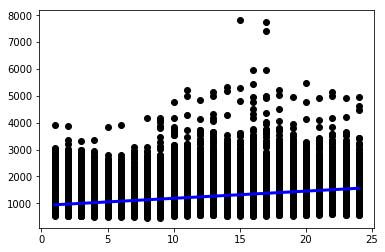

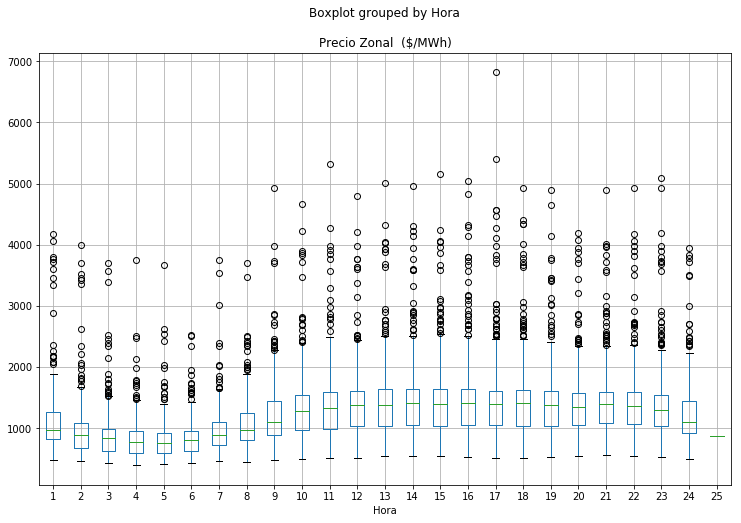

In [10]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(df_x_test, df_y_test,  color='black')
plt.plot(df_x_test, df_y_pred, color='blue', linewidth=3)
plt.show()

#graficar box plot
data = dfFilt17
data.boxplot('Precio Zonal  ($/MWh)', by= 'Hora', figsize=(12,8))

plt.show()

### Conclusión 1:

Trás realizar una regresión lineal simple podemos darnos cuenta que utilizando una sola variable independiente no se realiza una predicción correcta, esto debido a que existe mucha dispersión en los datos, esto se puede apreciar en la parte inferior de los gráficos, en donde se notan puntos alejados de la regresión; por lo tanto será necesario agregar más variables a la predicción con el objetivo de ser más certeros. 

# Regresión Múltiple (Filtrado por zona)

Para realizar la regresión multiple, y no repetir dos veces el proceso de transformar la fecha a valor númerico, se unieron las tablas de 2017 y 2018

In [11]:
frames = [df2017, df2018]
df1718 = pd.concat(frames)
df1718.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
0,01/01/2017,1,ACAPULCO,1010.09,640.92,77.38,291.79
1,01/01/2017,2,ACAPULCO,809.93,724.95,84.98,0.00
2,01/01/2017,3,ACAPULCO,707.82,638.03,69.79,0.00
3,01/01/2017,4,ACAPULCO,675.76,612.79,62.97,0.00
4,01/01/2017,5,ACAPULCO,659.99,600.75,59.25,0.00


Se filtra la nueva tabla creada

In [12]:
zona = 'ZAMORA'
dfZona1718 = df1718[df1718['Zona de Carga'].isin([zona])]

dfFilt = dfZona1718[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt.head()

,Fecha,Hora,Precio Zonal ($/MWh)
2352,01/01/2017,1,750.18
2353,01/01/2017,2,744.36
2354,01/01/2017,3,654.01
2355,01/01/2017,4,628.52
2356,01/01/2017,5,614.05


Se agrega una columna día para normalizar la fecha y lograr adicionarla como variable independiente.

In [13]:
from datetime import date
from datetime import datetime as dt

dfFilt = dfFilt.reset_index(drop= True)
dia=[] #serie donde coloco todo lo que voy a adicionar en la columna

for index,row in dfFilt.iterrows():
    dia.append(date.isoweekday(dt.strptime(row['Fecha'],'%d/%m/%Y')))
#https://pandas.pydata.org/pandas-docs/stable/merging.html
sdia=pd.Series(dia, name='Dia') 
dfFilt = pd.concat([dfFilt, sdia], axis=1)

print(dfFilt.head())

        Fecha  Hora  Precio Zonal  ($/MWh)  Dia
0  01/01/2017     1                 750.18    7
1  01/01/2017     2                 744.36    7
2  01/01/2017     3                 654.01    7
3  01/01/2017     4                 628.52    7
4  01/01/2017     5                 614.05    7


Se realiza ahora una regresión utilizando la columna día y hora como variables independientes. 

In [14]:
df_x = dfFilt[['Hora', 'Dia']]
df_y = dfFilt[['Precio Zonal  ($/MWh)']]

df_x_train = df_x[:8760]
df_x_test = df_x[8760:]

df_y_train = df_y[:8760]
df_y_test = df_y[8760:]

regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)


Se muestran los coeficientes de error y la varianza resultante.

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 26.77205889 -47.36503495]]
Mean squared error: 691395.85
Variance score: -0.22


Grafica de valores reales

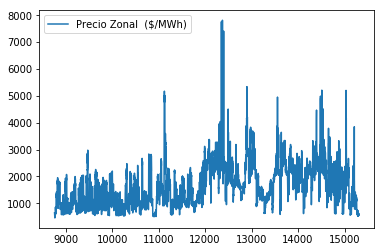

In [17]:
df_y_test.plot()

Gráfica valores predecidos

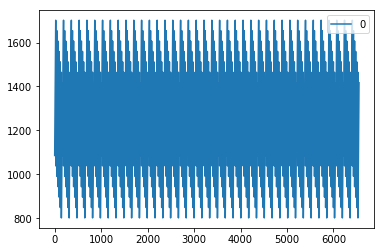

In [19]:
df_y_pred = pd.DataFrame(df_y_pred)
df_y_pred.plot()

Los resultados obtenidos de la regresión múltiple:

In [16]:
import statsmodels.api as sm

df_x = sm.add_constant(df_x)

model = sm.OLS(df_y, df_x).fit()
predictions = model.predict(df_x)

summ = model.summary()

print(summ)

                              OLS Regression Results                             
Dep. Variable:     Precio Zonal  ($/MWh)   R-squared:                       0.101
Model:                               OLS   Adj. R-squared:                  0.101
Method:                    Least Squares   F-statistic:                     862.8
Date:                   Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                           15:52:18   Log-Likelihood:            -1.2119e+05
No. Observations:                  15311   AIC:                         2.424e+05
Df Residuals:                      15308   BIC:                         2.424e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1333.6411 

# Regresión Multiple (Filtrado sin zona)

Se emite el fil. 

In [30]:
dfFilt2 = df1718[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt2.head()

,Fecha,Hora,Precio Zonal ($/MWh)
0,01/01/2017,1,1010.09
1,01/01/2017,2,809.93
2,01/01/2017,3,707.82
3,01/01/2017,4,675.76
4,01/01/2017,5,659.99


Se agrega la columna 'Día' que corresponderá a la variable independiente que se agrega para la regresión. 

In [31]:
dfFilt2 = dfFilt2.reset_index(drop= True)
dia=[] #serie donde coloco todo lo que voy a adicionar en la columna

for index,row in dfFilt2.iterrows():
    dia.append(date.isoweekday(dt.strptime(row['Fecha'],'%d/%m/%Y')))
#https://pandas.pydata.org/pandas-docs/stable/merging.html
sdia=pd.Series(dia, name='Dia') 
dfFilt2 = pd.concat([dfFilt2, sdia], axis=1)

dfFilt2.head()

,Fecha,Hora,Precio Zonal ($/MWh),Dia
0,01/01/2017,1,1010.09,7
1,01/01/2017,2,809.93,7
2,01/01/2017,3,707.82,7
3,01/01/2017,4,675.76,7
4,01/01/2017,5,659.99,7


In [32]:
df_x = dfFilt2[['Hora', 'Dia']]
df_y = dfFilt2[['Precio Zonal  ($/MWh)']]

df_x_train = df_x[:8760]
df_x_test = df_x[8760:]

df_y_train = df_y[:8760]
df_y_test = df_y[8760:]

regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)

In [33]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 18.05678693 -41.30229583]]
Mean squared error: 1060936.00
Variance score: -0.56


Gráfica Valores Reales

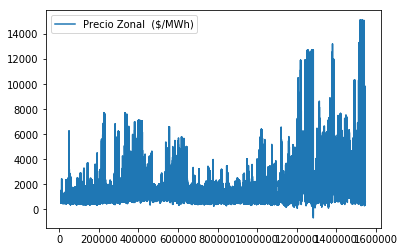

In [34]:
df_y_test.plot()

Gráfica valores predecidos

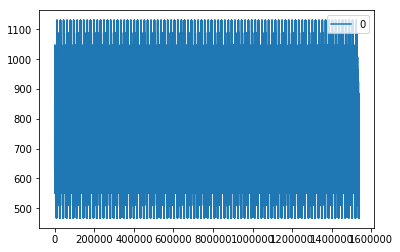

In [35]:
df_y_pred = pd.DataFrame(df_y_pred)
df_y_pred.plot()

In [36]:
df_x = sm.add_constant(df_x)

model = sm.OLS(df_y, df_x).fit()
predictions = model.predict(df_x)

summ2 = model.summary()

In [37]:
print(summ)

                              OLS Regression Results                             
Dep. Variable:     Precio Zonal  ($/MWh)   R-squared:                       0.101
Model:                               OLS   Adj. R-squared:                  0.101
Method:                    Least Squares   F-statistic:                     862.8
Date:                   Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                           15:52:18   Log-Likelihood:            -1.2119e+05
No. Observations:                  15311   AIC:                         2.424e+05
Df Residuals:                      15308   BIC:                         2.424e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1333.6411 

In [38]:
print(summ2)

                              OLS Regression Results                             
Dep. Variable:     Precio Zonal  ($/MWh)   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                  0.078
Method:                    Least Squares   F-statistic:                 6.499e+04
Date:                   Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                           16:10:35   Log-Likelihood:            -1.2517e+07
No. Observations:                1546411   AIC:                         2.503e+07
Df Residuals:                    1546408   BIC:                         2.503e+07
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1323.4666 

# Regresión Múltiple 3 Variables